In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data from .tsv file, had to ignore an error, imported as str for ease and will alter later

ks_data = pd.read_csv('38050-0001-Data.tsv', sep='\t', dtype=str, encoding_errors='ignore')


Organize Notebook, get a clean data set first then explore the data, statistical analysis, then modelling.

# My Functions

In [94]:
#get portion of data
def df_head(dataframe):
    if not dataframe.head().empty:
        return dataframe.head()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#get information
def df_info(dataframe):
    if not dataframe.empty:
        return dataframe.info() 
    else:
        return "There is an issue with your dataframe! Check your dataframe variable."

#get shape
def df_shape(dataframe):
    if dataframe.shape == (0,0):
        return "Your dataframe does not exist! Check your dataframe variable."
    else:
        return dataframe.shape

#decribe dataframe
def describe_df(dataframe):
    if not dataframe.empty:
        return dataframe.describe()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."


#get columns
def get_columns(dataframe):
    list_length = len(dataframe.columns)
    if list_length >= 0:
        return dataframe.columns
    else:
        return "There are no columns in your dataframe! Check your dataframe variable."

#get column data
def column_data(dataframe, column_name: str):
    if column_name in get_columns(dataframe):
        return dataframe[column_name]
    else:
        return "Your dataframe or column does not exist! Check your dataframe variable and columns."

#check nulls
def check_nulls(dataframe):
    num_nulls = dataframe.isnull().sum()
    percent_nulls = (num_nulls / len(dataframe) * 100).round(2)
    if not dataframe.empty:
        if num_nulls.sum() > 0:
            print(f"Here are the number of nulls per column: \n{num_nulls}")
            print(f"Here are the percent of nulls per column: \n{percent_nulls}")
        else:
            return "There are no nulls in your data."
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#check value counts
def unique(dataframe):
    if not dataframe.empty:
        return f"Here are the number of unique values per columns:", dataframe.nunique()


#check for dups
def check_dups(dataframe):
    num_dups = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {num_dups} duplicates in your dataframe"
    else:
        return "Your dataframe does not exist! Check your dataframe variable."
    
#drop dups
def drop_dups(dataframe):
    dups = check_dups(dataframe)
    if dups == 0:
        return dataframe
    else:
        return dataframe.drop_duplicates()


#Visuals 

def make_hist(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].hist(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make boxplots
def make_boxplot(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].boxplot(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make pairplot
def make_pairplot(dataframe):
    return sns.pairplot(dataframe)

#make heatmap
def make_heatmap(dataframe):
    correlation = dataframe.corr()
    return sns.heatmap(correlation, cmap='coolwarm', annot=True)

#make scatter plot
def make_scatter(dataframe, x_column, y_column, title: str, x_label: str, y_label: str):
    plt.scatter(x=dataframe[x_column], y=dataframe[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

# Exploratory Data Analysis

In [49]:
#make copy of raw data
ks_copy = ks_data.copy()

In [50]:
#first thing I want to do is check for duplicates
check_dups(ks_copy)

'There are 0 duplicates in your dataframe'

In [51]:
ks_copy.sample(10)

,CASEID,NAME,PID,CATEGORY,CATEGORY_ID,SUBCATEGORY,SUBCATEGORY_ID,PROJECT_PAGE_LOCATION_NAME,PROJECT_PAGE_LOCATION_STATE,PROJECT_PAGE_LOCATION_COUNTY,...,LAUNCHED_DATE,DEADLINE_DATE,PROJECT_CURRENCY,GOAL_IN_ORIGINAL_CURRENCY,PLEDGED_IN_ORIGINAL_CURRENCY,GOAL_IN_USD,PLEDGED_IN_USD,BACKERS_COUNT,STATE,URL_NAME
356664,356665,MASKED BY ICPSR,2019487244,Fashion,9,Apparel,263,Edmonton,AB,Alberta,...,8/12/2019,9/26/2019,CAD,"2,500",41,"$1,886",$31,2,failed,MASKED BY ICPSR
494028,494029,MASKED BY ICPSR,1948796430,Games,12,Video Games,35,Fayetteville,NC,Cumberland,...,9/23/2015,10/4/2015,USD,200,51,$200,$51,5,failed,MASKED BY ICPSR
15459,15460,MASKED BY ICPSR,1627857392,Photography,15,Places,279,Bornholm,Hovedstaden,Bornholms Regionskommune,...,4/11/2016,5/11/2016,DKK,"150,000","15,170","$22,962","$2,322",34,failed,MASKED BY ICPSR
371958,371959,MASKED BY ICPSR,1640326882,Music,14,Music,14,Baltimore,MD,Baltimore City,...,3/2/2014,4/6/2014,USD,"2,000","2,745","$2,000","$2,745",32,successful,MASKED BY ICPSR
183501,183502,MASKED BY ICPSR,610298878,Publishing,18,Nonfiction,48,Melbourne,VIC,,...,9/8/2015,10/8/2015,AUD,"10,000",0,"$7,196",$0,0,canceled,MASKED BY ICPSR
269024,269025,MASKED BY ICPSR,2037432091,Food,10,Food,10,Kirkland,WA,King,...,4/26/2013,5/11/2013,USD,"5,000","6,824","$5,000","$6,824",104,successful,MASKED BY ICPSR
466759,466760,MASKED BY ICPSR,1476575029,Art,1,Performance Art,24,Oakland,CA,Alameda,...,12/2/2010,1/1/2011,USD,500,605,$500,$605,32,successful,MASKED BY ICPSR
146392,146393,MASKED BY ICPSR,663637676,Crafts,26,Glass,347,Cusseta,GA,Chattahoochee,...,1/6/2015,2/7/2015,USD,"14,900",660,"$14,900",$660,11,canceled,MASKED BY ICPSR
405499,405500,MASKED BY ICPSR,662670917,Music,14,Music,14,Clusone,Lombardy,Bergamo,...,2/17/2020,3/18/2020,EUR,"1,350",106,"$1,489",$117,7,failed,MASKED BY ICPSR
18339,18340,MASKED BY ICPSR,764615942,Film & Video,11,Film & Video,11,East Setauket,NY,Suffolk,...,8/21/2015,9/20/2015,USD,"110,000",1,"$110,000",$1,1,canceled,MASKED BY ICPSR


In [52]:
#I will remove some columns like Name amd URL as the data is masked and some ID columns as the data is redundant

ks_copy = ks_copy.drop(['CASEID','NAME', 'PID', 'CATEGORY_ID', 'SUBCATEGORY_ID', 'UID', 'URL_NAME'], axis=1)

In [53]:
#let's format and rename the columns so it doesnt look like we are yelling

ks_copy.columns = ks_copy.columns.str.capitalize()

# Some of the column names are too long
new_features = {'Caseid': 'Case_ID', 'Project_page_location_name': 'Project_Country',
                 'Project_page_location_state': 'Project_State', 'Project_page_location_county': 'City',
                 'Launched_date': 'Launched', 'Deadline_date': 'Deadline',
                 'Project_currency': 'Project_Currency', 'Goal_in_original_currency': 'Goal',
                 'Pledged_in_original_currency': 'Pledged', 'Goal_in_usd': 'Goal (USD)',
                 'Pledged_in_usd': 'Pledged (USD)', 'Backers_count': 'Backers (#)',
                 'State': 'Status'}

#change column names
ks_copy.rename(columns=new_features, inplace=True)

In [54]:
# format the numerical columns - Goal, Pledged, Goal (USD), Pledged (USD), Backers (#)

numeric_columns = ['Goal', 'Pledged', 'Goal (USD)', 'Pledged (USD)', 'Backers (#)']


#need to change these functions
def replace_characters(dataframe, columns, characters, replacement, regex):
    for column in columns:
        dataframe[column].replace(characters, replacement, regex=regex, inplace=True)
    return dataframe


#change data types
def change_data_type(dataframe, columns, new_type):
   for column in columns:
       dataframe[column] = dataframe[column].astype(new_type)
   return df_info(dataframe)


In [55]:
#replace some regula expressions in numeric columns with empty string
replace_characters(ks_copy, numeric_columns, '\$|,|\\s', '', True)

,Category,Subcategory,Project_Country,Project_State,City,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,Film & Video,Science Fiction,London,England,Greater London,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,Film & Video,Fantasy,Los Angeles,CA,Los Angeles,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,Technology,Software,Mexico,Baja California,Tijuana,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,Publishing,Publishing,Columbus,OH,Franklin,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,Art,Illustration,Toronto,ON,Toronto,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506194,Publishing,Children's Books,Palo Alto,CA,Santa Clara,8/7/2014,9/6/2014,USD,1,0,1,0,0,failed
506195,Art,Conceptual Art,Detroit,MI,Wayne,11/25/2009,12/4/2009,USD,0,100,0,100,6,successful
506196,Publishing,Fiction,Lyme,NH,Grafton,11/7/2011,12/13/2011,USD,0,0,0,0,0,canceled
506197,Film & Video,Shorts,New York,NY,,1/25/2012,3/16/2012,USD,0,0,0,0,0,failed


In [56]:
#replace '' in numeric columns with np.nan
replace_characters(ks_copy, numeric_columns, '', np.nan, True)

,Category,Subcategory,Project_Country,Project_State,City,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,Film & Video,Science Fiction,London,England,Greater London,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,Film & Video,Fantasy,Los Angeles,CA,Los Angeles,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,Technology,Software,Mexico,Baja California,Tijuana,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,Publishing,Publishing,Columbus,OH,Franklin,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,Art,Illustration,Toronto,ON,Toronto,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506194,Publishing,Children's Books,Palo Alto,CA,Santa Clara,8/7/2014,9/6/2014,USD,1,0,1,0,0,failed
506195,Art,Conceptual Art,Detroit,MI,Wayne,11/25/2009,12/4/2009,USD,0,100,0,100,6,successful
506196,Publishing,Fiction,Lyme,NH,Grafton,11/7/2011,12/13/2011,USD,0,0,0,0,0,canceled
506197,Film & Video,Shorts,New York,NY,,1/25/2012,3/16/2012,USD,0,0,0,0,0,failed


In [57]:
#replace all values where empty string with np.NaN
replace_characters(ks_copy, ks_copy.columns, ' ', np.nan, False)

,Category,Subcategory,Project_Country,Project_State,City,Launched,Deadline,Project_Currency,Goal,Pledged,Goal (USD),Pledged (USD),Backers (#),Status
0,Film & Video,Science Fiction,London,England,Greater London,8/11/2016,10/10/2016,USD,100000000,0,100000000,0,0,canceled
1,Film & Video,Fantasy,Los Angeles,CA,Los Angeles,12/19/2019,2/14/2020,USD,100000000,85,100000000,85,4,canceled
2,Technology,Software,Mexico,Baja California,Tijuana,3/1/2017,3/22/2017,MXN,100000000,10,5219374,1,1,failed
3,Publishing,Publishing,Columbus,OH,Franklin,6/4/2018,7/5/2018,USD,100000000,1,100000000,1,1,canceled
4,Art,Illustration,Toronto,ON,Toronto,5/1/2015,6/30/2015,CAD,100000000,0,80610122,0,0,failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506194,Publishing,Children's Books,Palo Alto,CA,Santa Clara,8/7/2014,9/6/2014,USD,1,0,1,0,0,failed
506195,Art,Conceptual Art,Detroit,MI,Wayne,11/25/2009,12/4/2009,USD,0,100,0,100,6,successful
506196,Publishing,Fiction,Lyme,NH,Grafton,11/7/2011,12/13/2011,USD,0,0,0,0,0,canceled
506197,Film & Video,Shorts,New York,NY,NaN,1/25/2012,3/16/2012,USD,0,0,0,0,0,failed


In [58]:
#change Status values to title case

ks_copy['Status'] = ks_copy['Status'].str.title()

In [59]:
#check nulls now that they were added above
check_nulls(ks_copy)

Here are the number of nulls per column: 
Category                0
Subcategory             0
Project_Country      1873
Project_State        2014
City                64082
Launched                0
Deadline                0
Project_Currency        0
Goal                    0
Pledged                 0
Goal (USD)              0
Pledged (USD)           0
Backers (#)         10148
Status                  0
dtype: int64
Here are the percent of nulls per column: 
Category             0.00
Subcategory          0.00
Project_Country      0.37
Project_State        0.40
City                12.66
Launched             0.00
Deadline             0.00
Project_Currency     0.00
Goal                 0.00
Pledged              0.00
Goal (USD)           0.00
Pledged (USD)        0.00
Backers (#)          2.00
Status               0.00
dtype: float64


Nulls are present in Country, State, City, Backers. City has a null frequency of 12.66, but the others are 2% and lower. Will decide how to proceed later.

In [60]:
#see unique values per feature
unique(ks_copy)
#There are not over 21k countries...

('Here are the number of unique values per columns:',
 Category               15
 Subcategory           161
 Project_Country     21201
 Project_State        1550
 City                 5412
 Launched             4256
 Deadline             4208
 Project_Currency       15
 Goal                10725
 Pledged             52112
 Goal (USD)          41992
 Pledged (USD)       49686
 Backers (#)          1001
 Status                  4
 dtype: int64)

Will do a breakdown of Category, Status and Country.

There are apparantly over 21k unique values for countries which is False. The Project_State and city are also a complete mess and will take too much time to clean. So, I will drop them. I will also drop the Goal and Pledged for USD as they are redundant.

From the [Kickstarter website](https://help.kickstarter.com/hc/en-us/articles/115005127954-Can-I-choose-my-project-s-display-currency-#:~:text=Kickstarter%20does%20offer%20backers%20the%20option%20to%20set,currency%2C%20not%20in%20a%20backer%E2%80%99s%20preferred%20display%20currency.), the following is given
 > "It’s not possible to choose a preferred display currency for your project. By default, the currency your project will display and collect funds in is determined by the country of origin* you indicate when building your project. For example, if your banking and identity information are based in, say, Hong Kong, your project goal and reward costs will automatically be displayed in HKD. Once your project ends, the funds collected will be sent to you in HKD. If you’re in the UK, they’ll be in GBP, and so on. Kickstarter does offer backers the option to set a preferred display currency when browsing projects. However, pledges will always be collected in the project’s native currency, not in a backer’s preferred display currency. *For projects launching from Denmark, Norway, Sweden, Switzerland, and Poland, creators now have the option to choose whether to run their project in their country’s native currency, or in Euros.*"

So, I will use the currency codes to replace the Project_country, and drop the State, and city. There are no nulls in Project_currency so I will use those to map the missing values in countries


In [61]:
#make dictionary using project currency

currency_codes = {'USD': 'United States of America', 'EUR': 'Europe', 'GBP': 'United Kingdom', 'CAD': 'Canada', 
                  'AUD': 'Australia', 'MXN': 'Mexico', 'SEK': 'Sweden', 'HKD': 'Hong Kong',
                  'NZD': 'New Zealand', 'DKK': 'Denmark', 'SGD': 'Singapore', 'CHF': 'Switzerland',
                  'NOK': 'Norway', 'JPY': 'Japan', 'PLN': 'Poland'}

#replace Project_Country values with currency code dictionary
ks_copy['Project_Country'] = ks_copy['Project_Currency'].map(currency_codes)

#Drop project_state, city, Goal and pledged (USD)
ks_copy.drop(['Project_State', 'City', 'Goal (USD)', 'Pledged (USD)'], axis=1, inplace=True)

In [16]:
#view data to see format
df_head(ks_copy)

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status
0,Film & Video,Science Fiction,United States of America,8/11/2016,10/10/2016,USD,100000000,0,0,Canceled
1,Film & Video,Fantasy,United States of America,12/19/2019,2/14/2020,USD,100000000,85,4,Canceled
2,Technology,Software,Mexico,3/1/2017,3/22/2017,MXN,100000000,10,1,Failed
3,Publishing,Publishing,United States of America,6/4/2018,7/5/2018,USD,100000000,1,1,Canceled
4,Art,Illustration,Canada,5/1/2015,6/30/2015,CAD,100000000,0,0,Failed


In [17]:
#view data types and see what needs to change
df_info(ks_copy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Category          506199 non-null  object
 1   Subcategory       506199 non-null  object
 2   Project_Country   506199 non-null  object
 3   Launched          506199 non-null  object
 4   Deadline          506199 non-null  object
 5   Project_Currency  506199 non-null  object
 6   Goal              506199 non-null  object
 7   Pledged           506199 non-null  object
 8   Backers (#)       496051 non-null  object
 9   Status            506199 non-null  object
dtypes: object(10)
memory usage: 38.6+ MB


I need to change Launched and Deadline to DateTimee

Goal, Pledged, Backers (#) should become ints

Still need to deal with nulls in Backers (#)

In [62]:
#change Launched and Deadline to datetime

ks_copy['Launched'] = pd.to_datetime(ks_copy['Launched'])
ks_copy['Deadline'] = pd.to_datetime(ks_copy['Deadline'])

In [63]:
#calculate the duration of campaign in days
ks_copy['Duration (days)'] = (ks_copy['Deadline'] - ks_copy['Launched']).dt.days

In [64]:
#some more data cleaning

#fill nan with 0 in Backers (#)
ks_copy['Backers (#)'].fillna(0, inplace=True)

#change data type of Goal, Pledged, Backers (#) to int
change_data_type(ks_copy, ['Goal', 'Pledged', 'Backers (#)'], int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Category          506199 non-null  object        
 1   Subcategory       506199 non-null  object        
 2   Project_Country   506199 non-null  object        
 3   Launched          506199 non-null  datetime64[ns]
 4   Deadline          506199 non-null  datetime64[ns]
 5   Project_Currency  506199 non-null  object        
 6   Goal              506199 non-null  int64         
 7   Pledged           506199 non-null  int64         
 8   Backers (#)       506199 non-null  int64         
 9   Status            506199 non-null  object        
 10  Duration (days)   506199 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 42.5+ MB


I have made the necessary data type conversions and dealt with nulls... Yay!

Next, I want to see if any of the numeric columns are under 0 and change those to 0

In [67]:
#check if any of the numeric columns have values under 0

under_0 =  ks_copy[(ks_copy['Goal'] < 0) | (ks_copy['Pledged'] < 0) | (ks_copy['Backers (#)'] < 0) | (ks_copy['Duration (days)'] < 0)]

#replace negative in Backers(#) - they were classified as Failed, so 0 makes sense.
ks_copy.loc[under_0.index, 'Backers (#)'] = 0


In [68]:
ks_copy[(ks_copy['Goal'] < 0) | (ks_copy['Pledged'] < 0) | (ks_copy['Backers (#)'] < 0) | (ks_copy['Duration (days)'] < 0)]

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)


In [70]:
#check for successful campaigns that have 0 backers - 9890 instances will replace these with medians
success_no_backers = (ks_copy['Backers (#)'] == 0) & (ks_copy['Status'] == 'Successful')

#get median values for successful campaigns
median_backers_success = ks_copy.loc[(ks_copy['Status'] == 'Successful') & (ks_copy['Backers (#)'] != 0), 'Backers (#)'].median()

# Replace the values that are 0 with the median value
ks_copy.loc[success_no_backers, 'Backers (#)'] = median_backers_success

In [46]:
#check to see if above worked - 
ks_copy[(ks_copy['Backers (#)'] == 0) & (ks_copy['Status'] == 'Successful')]

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days),Year,Month


In [72]:
#check for Successful status where Pledged < Goal - These should be Failures 6 instances
should_be_fails = ks_copy[(ks_copy['Status'] == 'Successful') & (ks_copy['Pledged'] < ks_copy['Goal'])]

# Replace the values that match the condition with 'Failed'
ks_copy.loc[ks_copy['Pledged'] < ks_copy['Goal'], 'Status'] = 'Failed'

In [73]:
#check above
ks_copy[(ks_copy['Status'] == 'Successful') & (ks_copy['Pledged'] < ks_copy['Goal'])]

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)


In [74]:
#check for Failed Campaigns where pledged > Goal - These should be successful - 2065 instances
should_be_success = (ks_copy['Status'] == 'Failed') & (ks_copy['Pledged'] > ks_copy['Goal'])

#replace above values 
ks_copy.loc[should_be_success, 'Status'] = 'Successful'

In [75]:
#check above
ks_copy[(ks_copy['Status'] == 'Failed') & (ks_copy['Pledged'] > ks_copy['Goal'])]

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal,Pledged,Backers (#),Status,Duration (days)


In [76]:
#add columns for Year and Month

ks_copy['Year'] = ks_copy['Launched'].dt.year
ks_copy['Month'] = ks_copy['Launched'].dt.month

Need to start do EDA - explore categories, countries, status

Counts - Category, Project_Country, Status, years?
Histograms - Goal, Pledged, Backers, Duration
Boxplots - Goal, Pledged, Backers, Duration
pairplot
heatmap - will need to get dummies for data

In [31]:
#make bar graphs for count data
def get_counts(dataframe, column):
    new_df = pd.DataFrame(dataframe[column].value_counts())
    new_df.reset_index(inplace=True)
    new_df.rename(columns={'index': column, column: 'Count'}, inplace=True)
    return new_df

# function to graph counts
def graph_counts(dataframe, x_column, y_column, figsize=tuple):
    plt.figure(figsize=figsize)
    plt.bar(dataframe[x_column], dataframe[y_column])
    plt.xticks(rotation=45)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"{x_column} {y_column}")
    plt.show()

In [21]:
#count of campaigns by category
category_counts = get_counts(ks_copy, 'Category')

#count of campaigns by Country
country_count = get_counts(ks_copy, 'Project_Country')

#count of campaigns by Status
status_count = get_counts(ks_copy, 'Status')

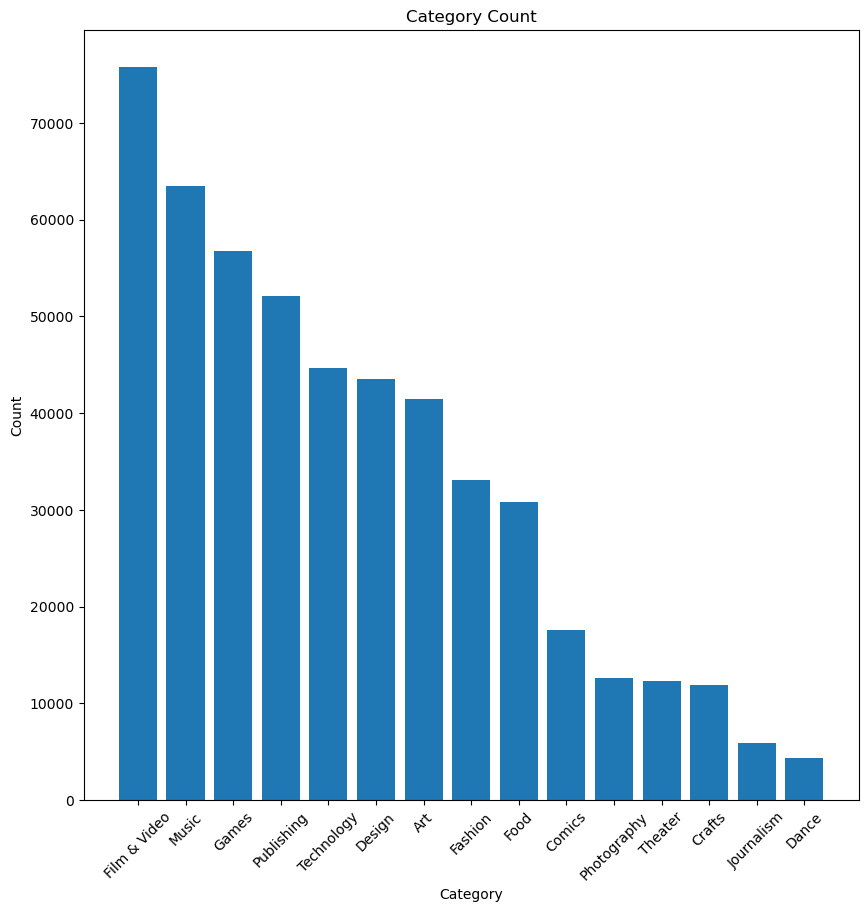

In [22]:
#graph campaign counts by category
graph_counts(category_counts, 'Category', 'Count', figsize=(10, 10))

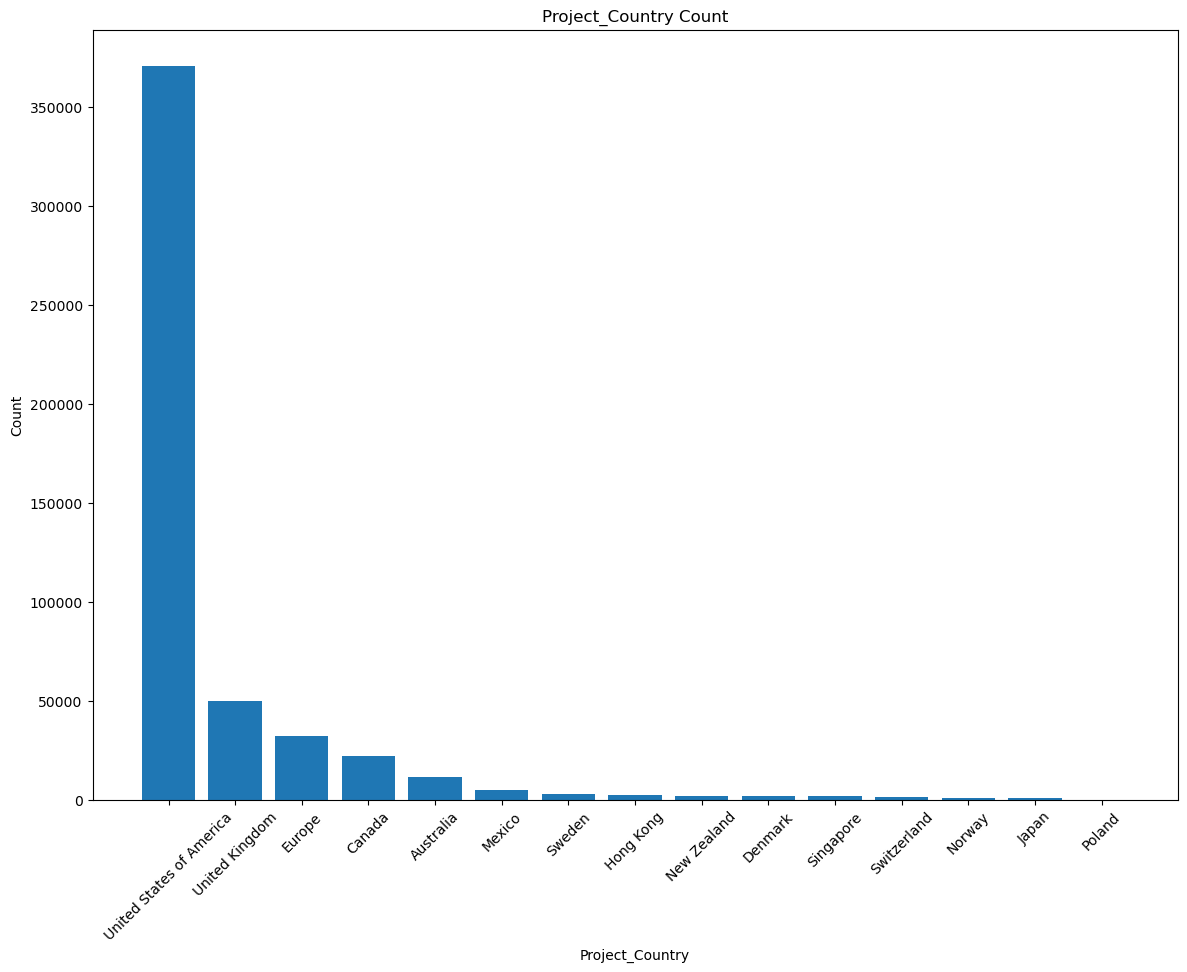

In [23]:
#graph campaign count by country
graph_counts(country_count, 'Project_Country', 'Count',  figsize=(14, 10))

In [24]:
#percent of data that country contributes
(ks_copy['Project_Country'].value_counts() / len(ks_copy) * 100).round()

United States of America    73.0
United Kingdom              10.0
Europe                       6.0
Canada                       4.0
Australia                    2.0
Mexico                       1.0
Sweden                       1.0
Hong Kong                    1.0
New Zealand                  0.0
Denmark                      0.0
Singapore                    0.0
Switzerland                  0.0
Norway                       0.0
Japan                        0.0
Poland                       0.0
Name: Project_Country, dtype: float64

The US UK, Europe, Canada, and Australia account for the majority of instances in the dataset, I will focus on those only. 

I will add Sweden, Denmark, Switzerland, Norway, and Poland to the Europe count. I will also change the currency for these countries to Euro.

From the [Kickstarter website](https://help.kickstarter.com/hc/en-us/articles/115005127954-Can-I-choose-my-project-s-display-currency-#:~:text=Kickstarter%20does%20offer%20backers%20the%20option%20to%20set,currency%2C%20not%20in%20a%20backer%E2%80%99s%20preferred%20display%20currency.), the following is given
 > "It’s not possible to choose a preferred display currency for your project. By default, the currency your project will display and collect funds in is determined by the country of origin* you indicate when building your project. For example, if your banking and identity information are based in, say, Hong Kong, your project goal and reward costs will automatically be displayed in HKD. Once your project ends, the funds collected will be sent to you in HKD. If you’re in the UK, they’ll be in GBP, and so on. Kickstarter does offer backers the option to set a preferred display currency when browsing projects. However, pledges will always be collected in the project’s native currency, not in a backer’s preferred display currency. *For projects launching from Denmark, Norway, Sweden, Switzerland, and Poland, creators now have the option to choose whether to run their project in their country’s native currency, or in Euros.*"

Given, European Union countries have a choice I will consolidate them to Euros and Europe as Europe already accounts for more campaigns than individual EU countries

In [25]:
#set dictionaries to replace values
euro_dict = {'Sweden': 'Europe', 'Denmark': 'Europe', 'Switzerland': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe'}
euro_currency = {'SEK': 'EUR', 'DKK': 'EUR', 'CHF': 'EUR', 'NOK': 'EUR', 'PLN': 'EUR'}

#replace European countries with Europe and Euro, lose some granularity, but will be better
ks_copy['Project_Country'].replace(euro_dict, inplace=True)
ks_copy['Project_Currency'].replace(euro_currency, inplace=True)

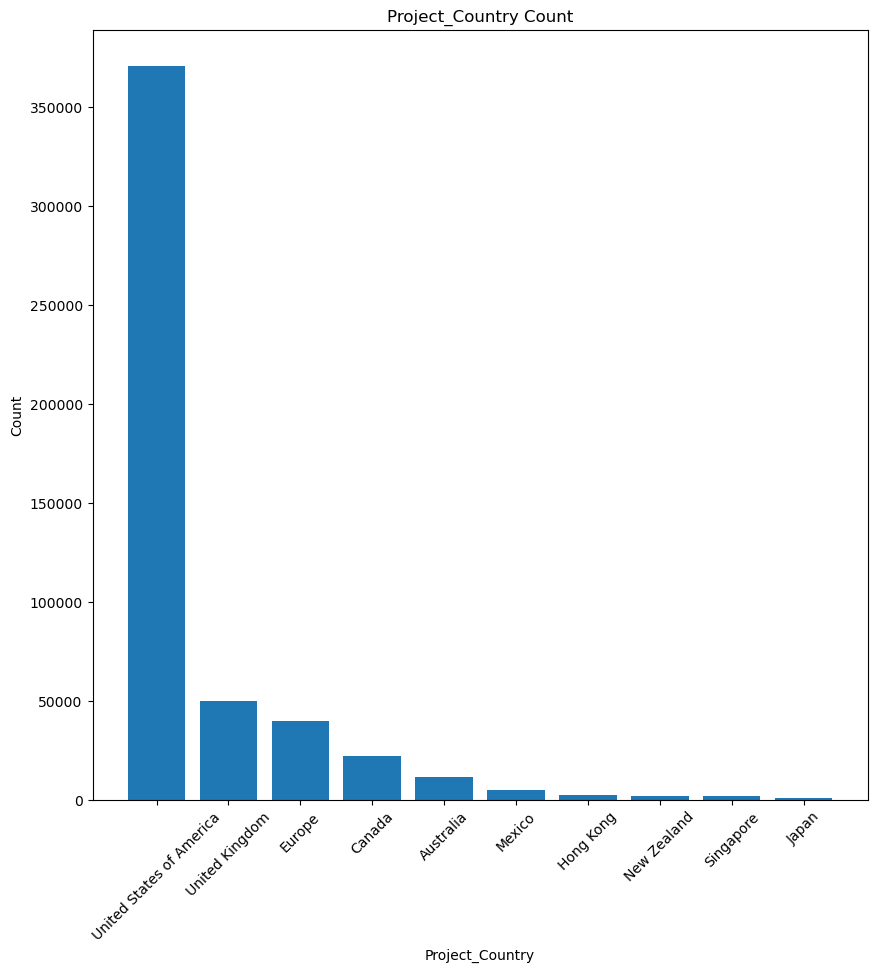

In [26]:
#regraph country counts
country_count = get_counts(ks_copy, 'Project_Country')
graph_counts(country_count, 'Project_Country', 'Count', (10, 10))

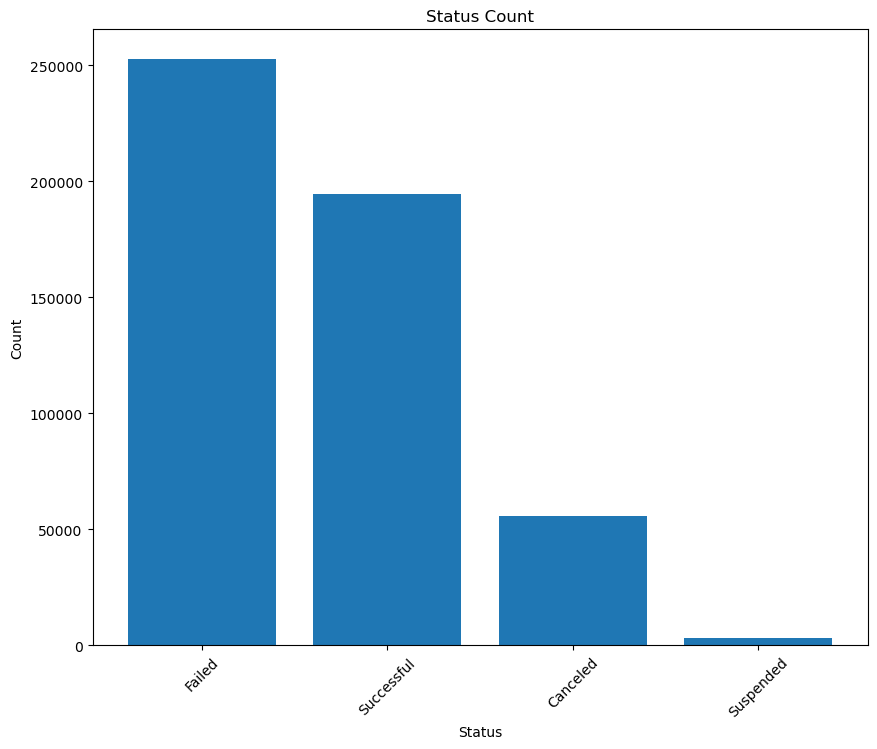

In [68]:
#graph campaign counts by Status
graph_counts(status_count, 'Status', 'Count', (10, 8))

There are more Failed campaigns than Successful ones. I do consider Canceled and Suspended as Failed and I will reflect that in the dataframe

In [29]:
#Replace Canceled and Suspended with Failed
ks_copy['Status'].replace(['Canceled', 'Suspended'], 'Failed', inplace=True)

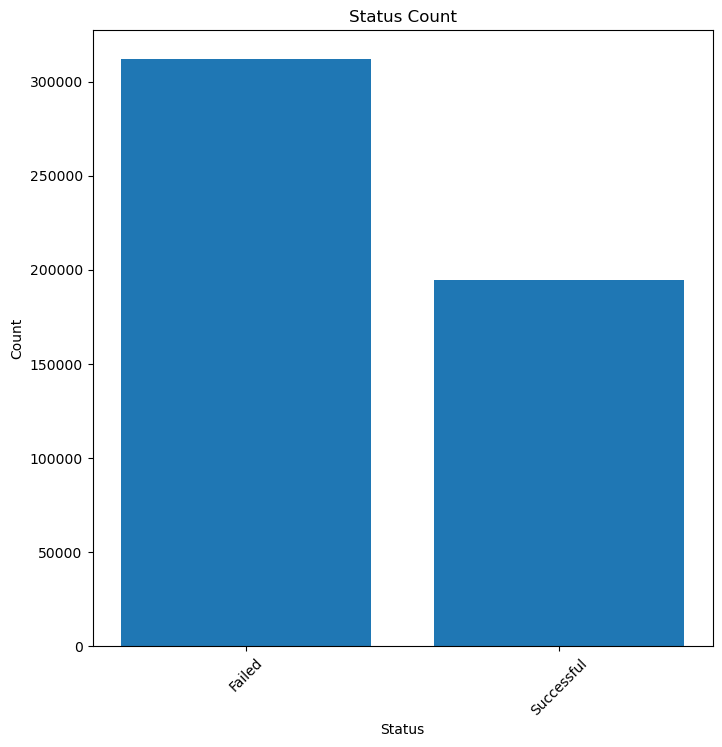

In [32]:
#remake counts and graphs for status

status_count = get_counts(ks_copy, 'Status')
graph_counts(status_count, 'Status', 'Count',(8,8))

Important to note the unbalanced dataset for later modelling

Let's explore success rates by category and country

In [33]:
#success rates by category and country

#function to get success rate
def success_rate(dataframe):
    return (dataframe.eq('Successful').sum() / dataframe.size *100).round(0)

#plot success rate
def plot_success_rate(data, title, xlabel, ylabel, rot=int, figsize=tuple):
    data.plot.bar(rot=rot, figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

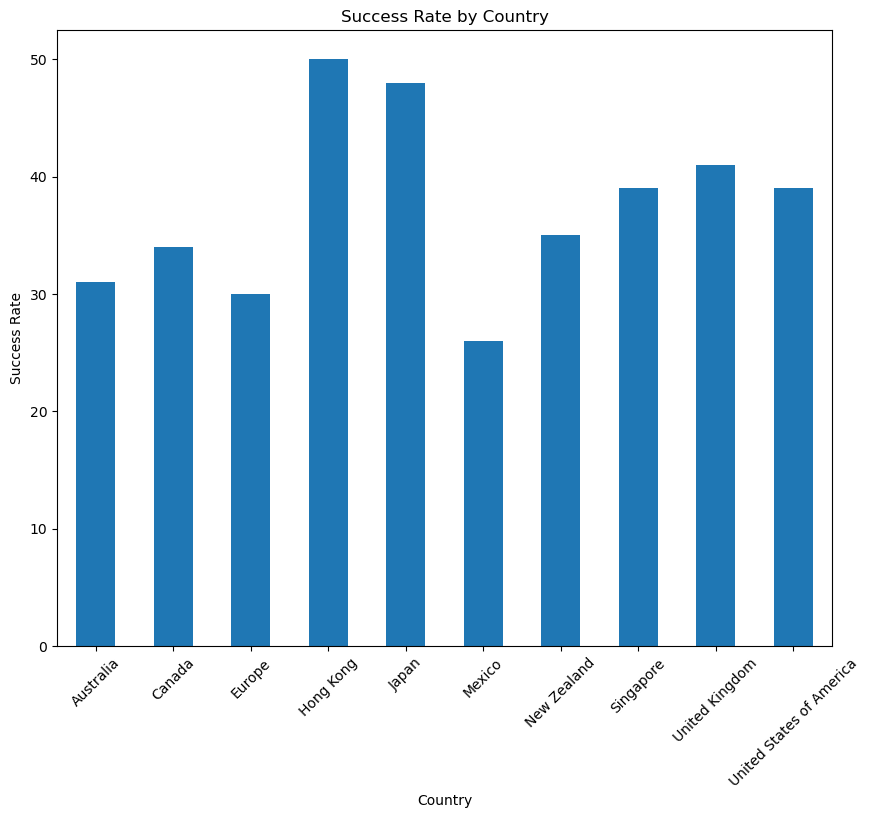

In [31]:
#success rate by country
country_success = ks_copy.groupby('Project_Country')['Status'].agg(success_rate)
#plot success rate
plot_success_rate(country_success, 'Success Rate by Country', 'Country', 'Success Rate', 45, (10, 8))


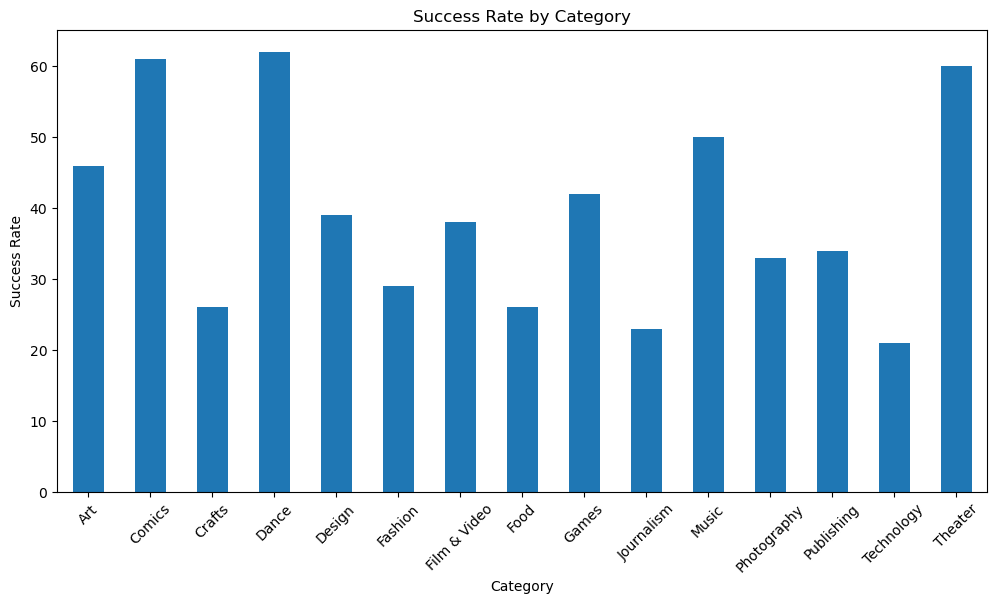

In [32]:
# success rate by category
category_success = ks_copy.groupby('Category')['Status'].agg(success_rate)
plot_success_rate(category_success, 'Success Rate by Category', 'Category', 'Success Rate', rot=45, figsize=(12, 6))

In [92]:
#don't run code... need to work out graphing code. 

#success by country and category
country_category = ks_copy.groupby(["Project_Country", "Category"])["Status"].agg(success_rate)

country_category_df = pd.DataFrame(country_category)
country_category_df.reset_index(inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the sales of product A in each country as a bar chart
sns.barplot(x="country", y="sales", data=df[df["product"] == "A"], ax=axes[0])
axes[0].set_title("Sales of Product A")

# Plot the sales of product B in each country as a bar chart
sns.barplot(x="country", y="sales", data=df[df["product"] == "B"], ax=axes[1])
axes[1].set_title("Sales of Product B")

# Plot the sales of product C in each country as a bar chart
sns.barplot(x="country", y="sales", data=df[df["product"] == "C"], ax=axes[2])
axes[2].set_title("Sales of Product C")

# Show the plot
plt.show()

In [38]:
# check nulls and 0's
check_nulls(ks_copy)

Here are the number of nulls per column: 
Category                 0
Subcategory              0
Project_Country          0
Launched                 0
Deadline                 0
Project_Currency         0
Goal                     0
Pledged                  0
Backers (#)         194458
Status                   0
Duration (days)          0
Year                     0
Month                    0
dtype: int64
Here are the percent of nulls per column: 
Category             0.00
Subcategory          0.00
Project_Country      0.00
Launched             0.00
Deadline             0.00
Project_Currency     0.00
Goal                 0.00
Pledged              0.00
Backers (#)         38.42
Status               0.00
Duration (days)      0.00
Year                 0.00
Month                0.00
dtype: float64


In [66]:
#check again for nulls for peace of mind
ks_copy.isna().sum()

Category            0
Subcategory         0
Project_Country     0
Launched            0
Deadline            0
Project_Currency    0
Goal                0
Pledged             0
Backers (#)         0
Status              0
Duration (days)     0
dtype: int64

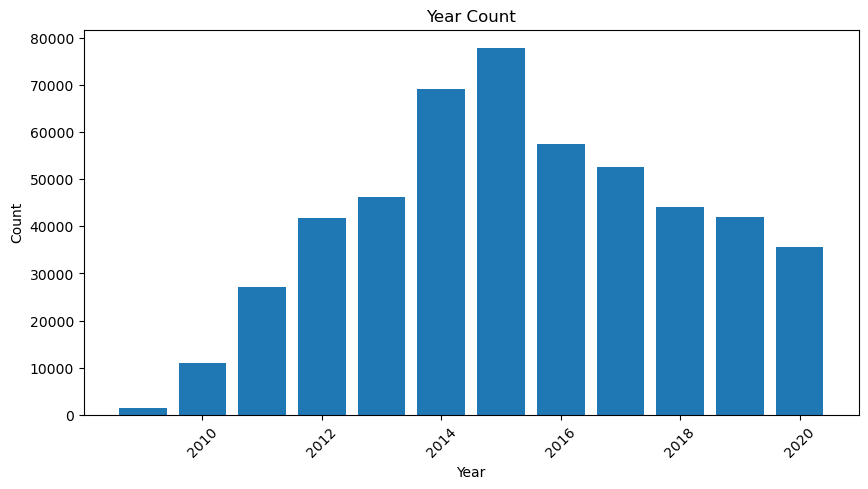

In [44]:
#get campaign counts per year, per month, success/fail rate for both too, top category per year and month

#campaign counts per year
counts_year = get_counts(ks_copy, 'Year')
graph_counts(counts_year, 'Year', 'Count', (10, 5))

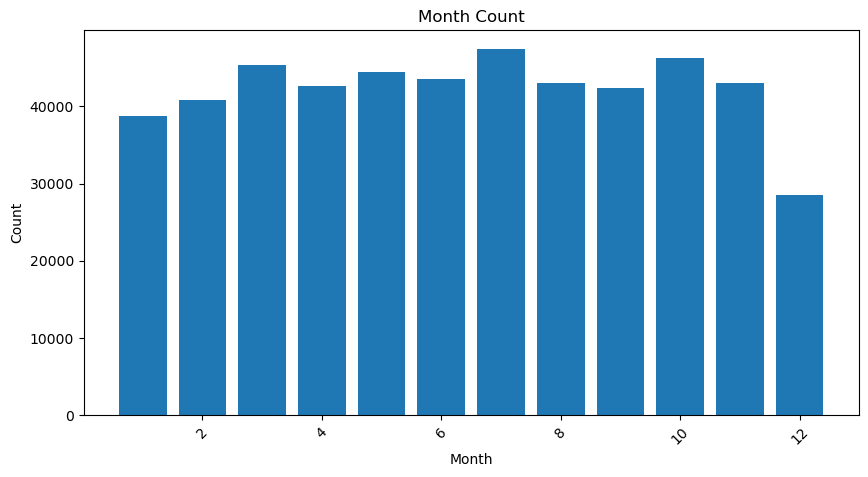

In [49]:
#campaign counts per month
count_month = get_counts(ks_copy, 'Month')
graph_counts(count_month, 'Month', 'Count', (10, 5))

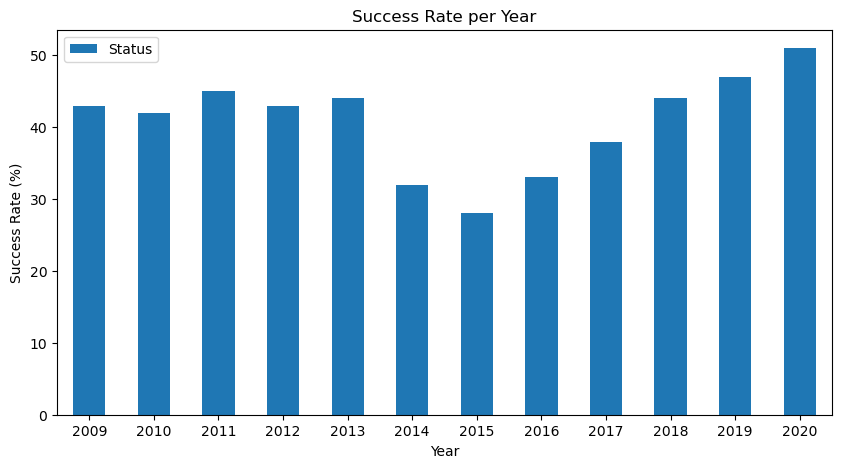

In [120]:
#new df for success rate by year
time_df = ks_copy[['Category' , 'Year', 'Month', 'Status']].copy()

#success rate for years
success_rate_years =  pd.DataFrame(time_df.groupby('Year')['Status'].agg(success_rate))

#plot success rate/ year
plot_success_rate(success_rate_years, 'Success Rate per Year', 'Year', 'Success Rate (%)', rot=0, figsize=(10, 5))



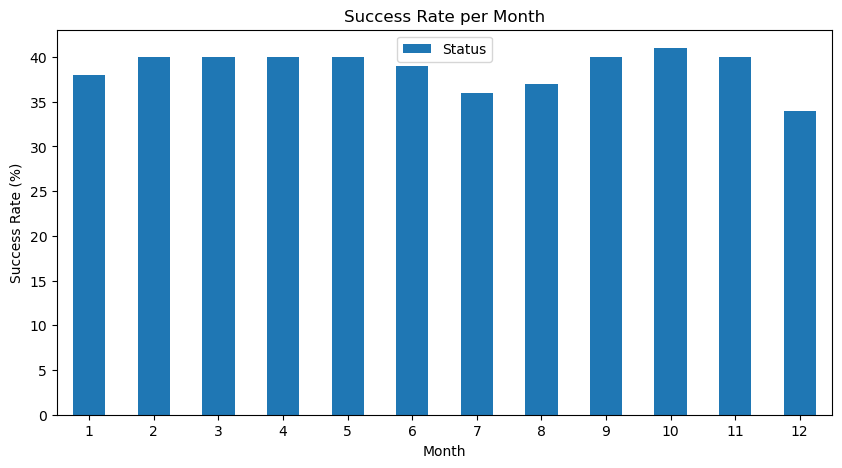

In [121]:
#success rate per month

success_rate_months = pd.DataFrame(time_df.groupby('Month')['Status'].agg(success_rate))
plot_success_rate(success_rate_months, 'Success Rate per Month', 'Month', 'Success Rate (%)', rot=0, figsize=(10, 5))

In [ ]:
#do success rate by month per year? Drop Sub category, because too much

In [ ]:
#maybe explore more figures in Tableau or Excel and link to PP

Data distribution

In [34]:
unique(ks_copy)

('Here are the number of unique values per columns:',
 Category               15
 Subcategory           161
 Project_Country        15
 Launched             4256
 Deadline             4208
 Project_Currency       15
 Goal                10725
 Pledged             52112
 Backers (#)             1
 Status                  2
 Duration (days)        95
 Year                   12
 Month                  12
 dtype: int64)

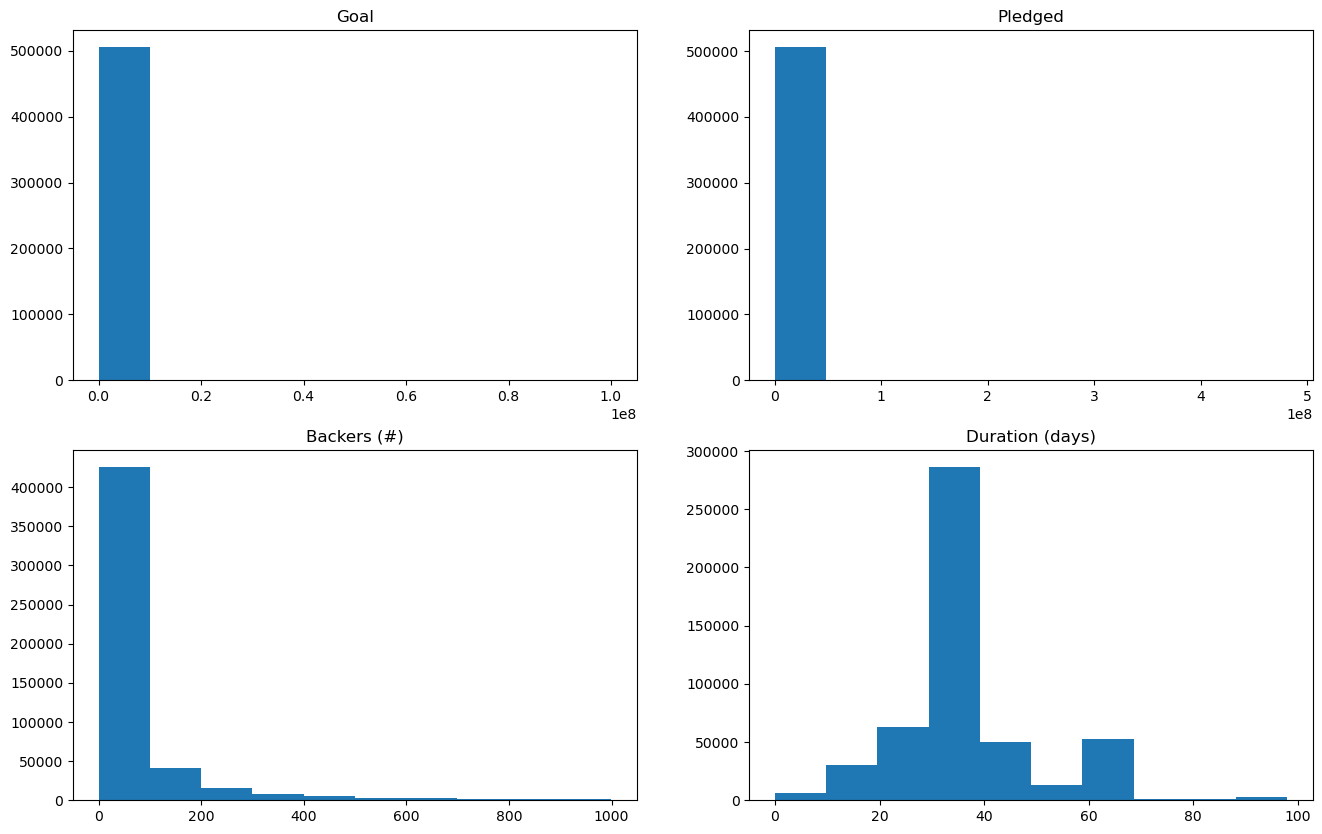

In [82]:
#list for numeric columns
numeric_data = ['Goal', 'Pledged', 'Backers (#)', 'Duration (days)']

#make histograms and boxplots
make_hist(ks_copy, numeric_data, 2, 2, (16, 10))

Holy moly...will have to do something with Goal and Pledged... and Backers and Duration

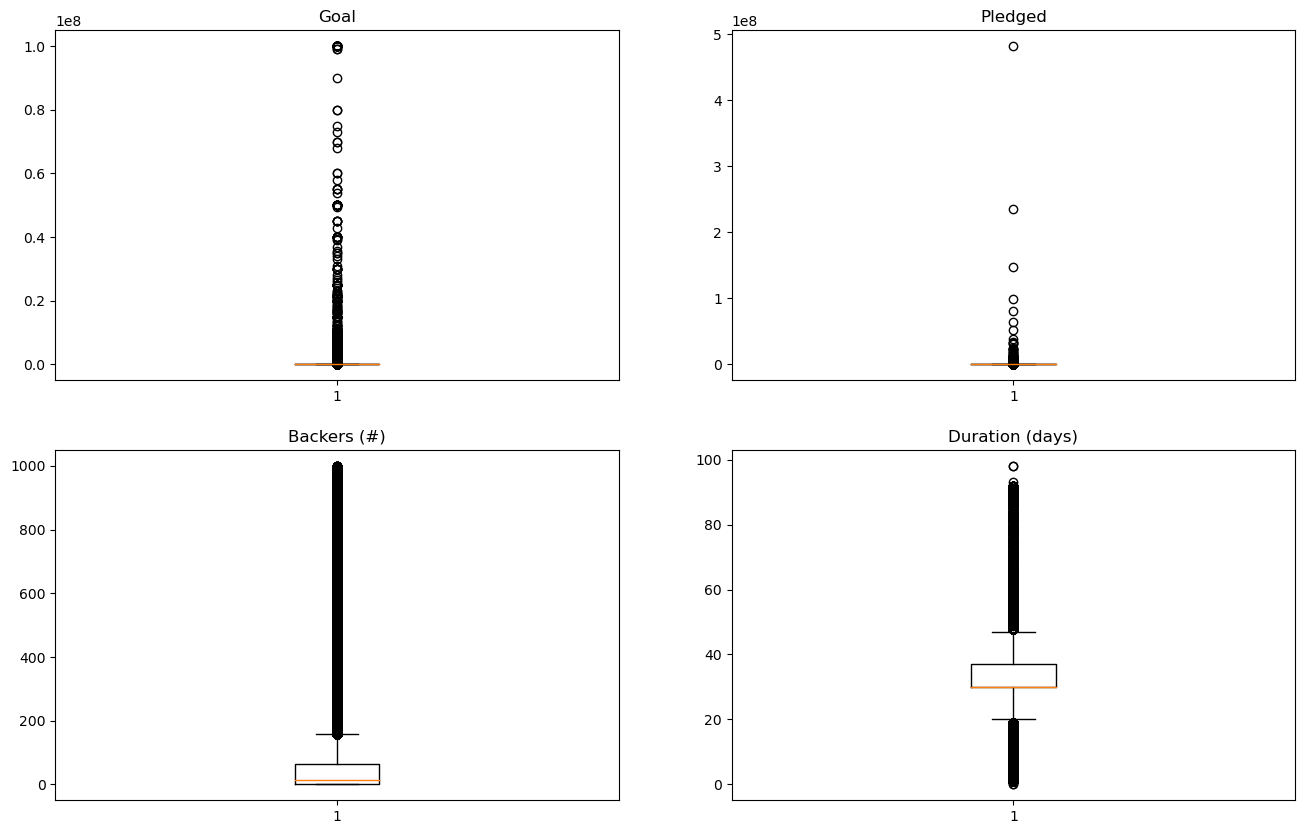

In [83]:
#make some boxplots
make_boxplot(ks_copy, numeric_data, 2, 2, (16, 10))

In [62]:
#how to transform the data? 
# for pledged and goal - log transform may be best
#for backers and duration in days - log for backers and winsorization for duration perhaps 

In [84]:
# For Goal, Pledged, and Backers need to do add 1 to all data points then take np.log10

#function to add 1 and take np.log10
def log10p(data):
    data = data + 1
    y = np.log10(data)
    return y

In [85]:
#log transform data
ks_copy.loc[:, ['Goal', 'Pledged', 'Backers (#)']] = log10p(ks_copy[['Goal', 'Pledged', 'Backers (#)']])


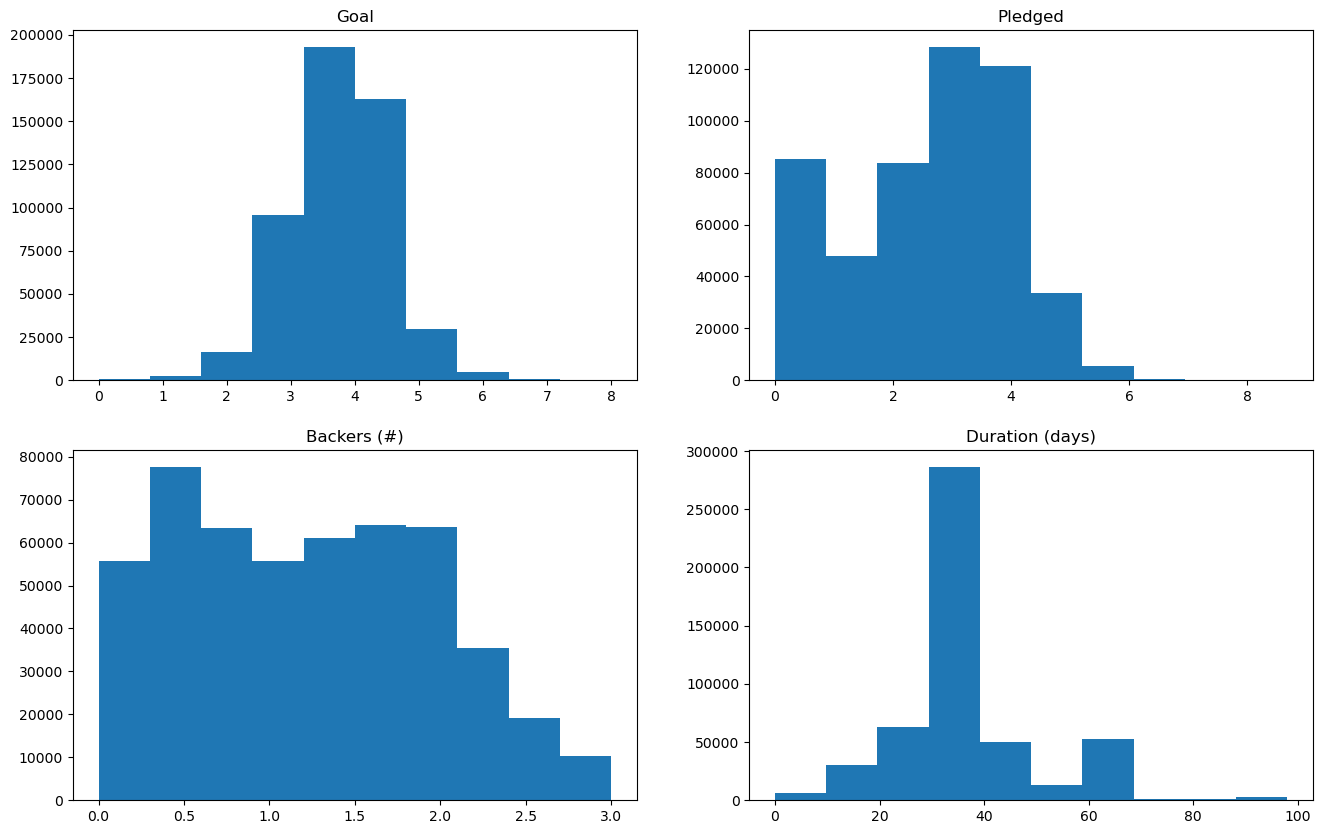

In [86]:
columns = ['Goal', 'Pledged', 'Backers (#)', 'Duration (days)']
make_hist(ks_copy, columns, 2, 2, (16, 10))

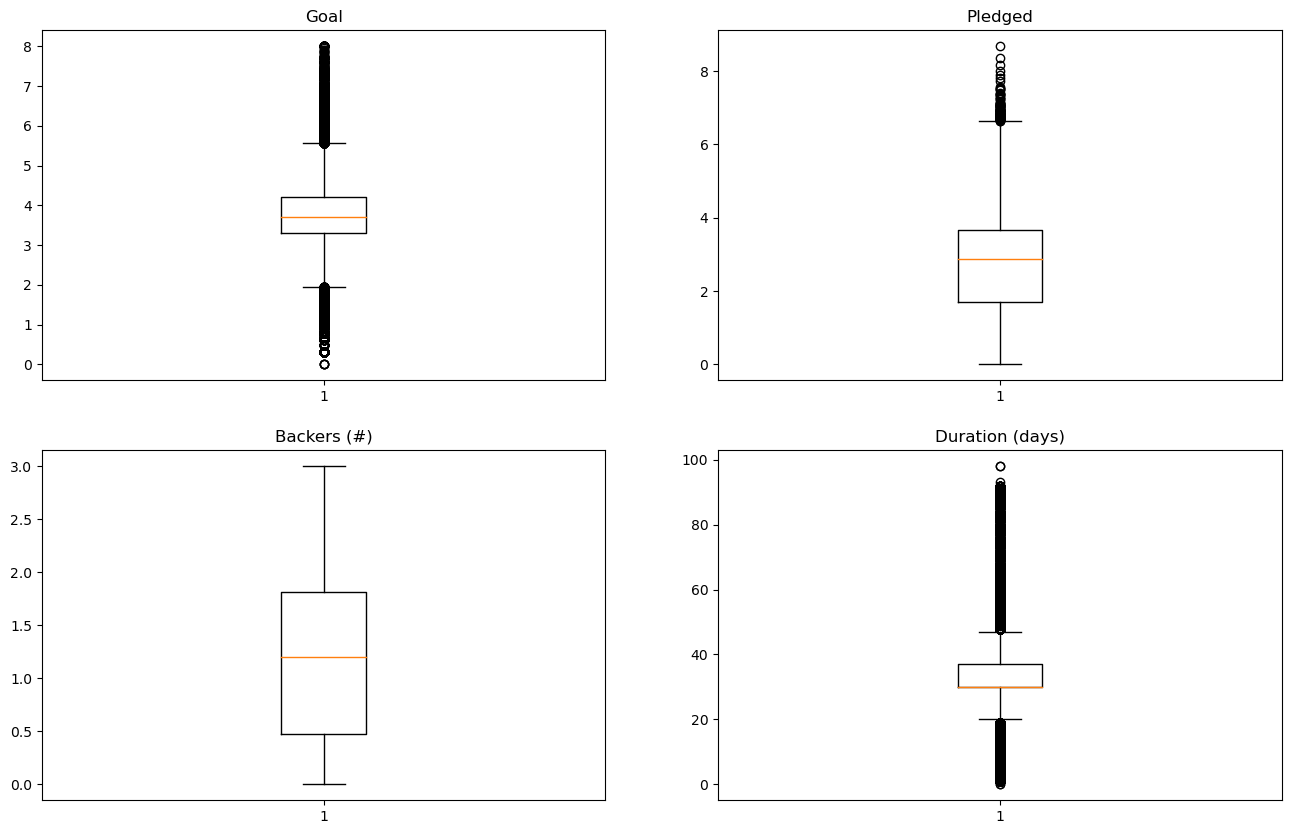

In [87]:
make_boxplot(ks_copy, columns, 2, 2, (16, 10))

okay...need to deal with outliers somehow

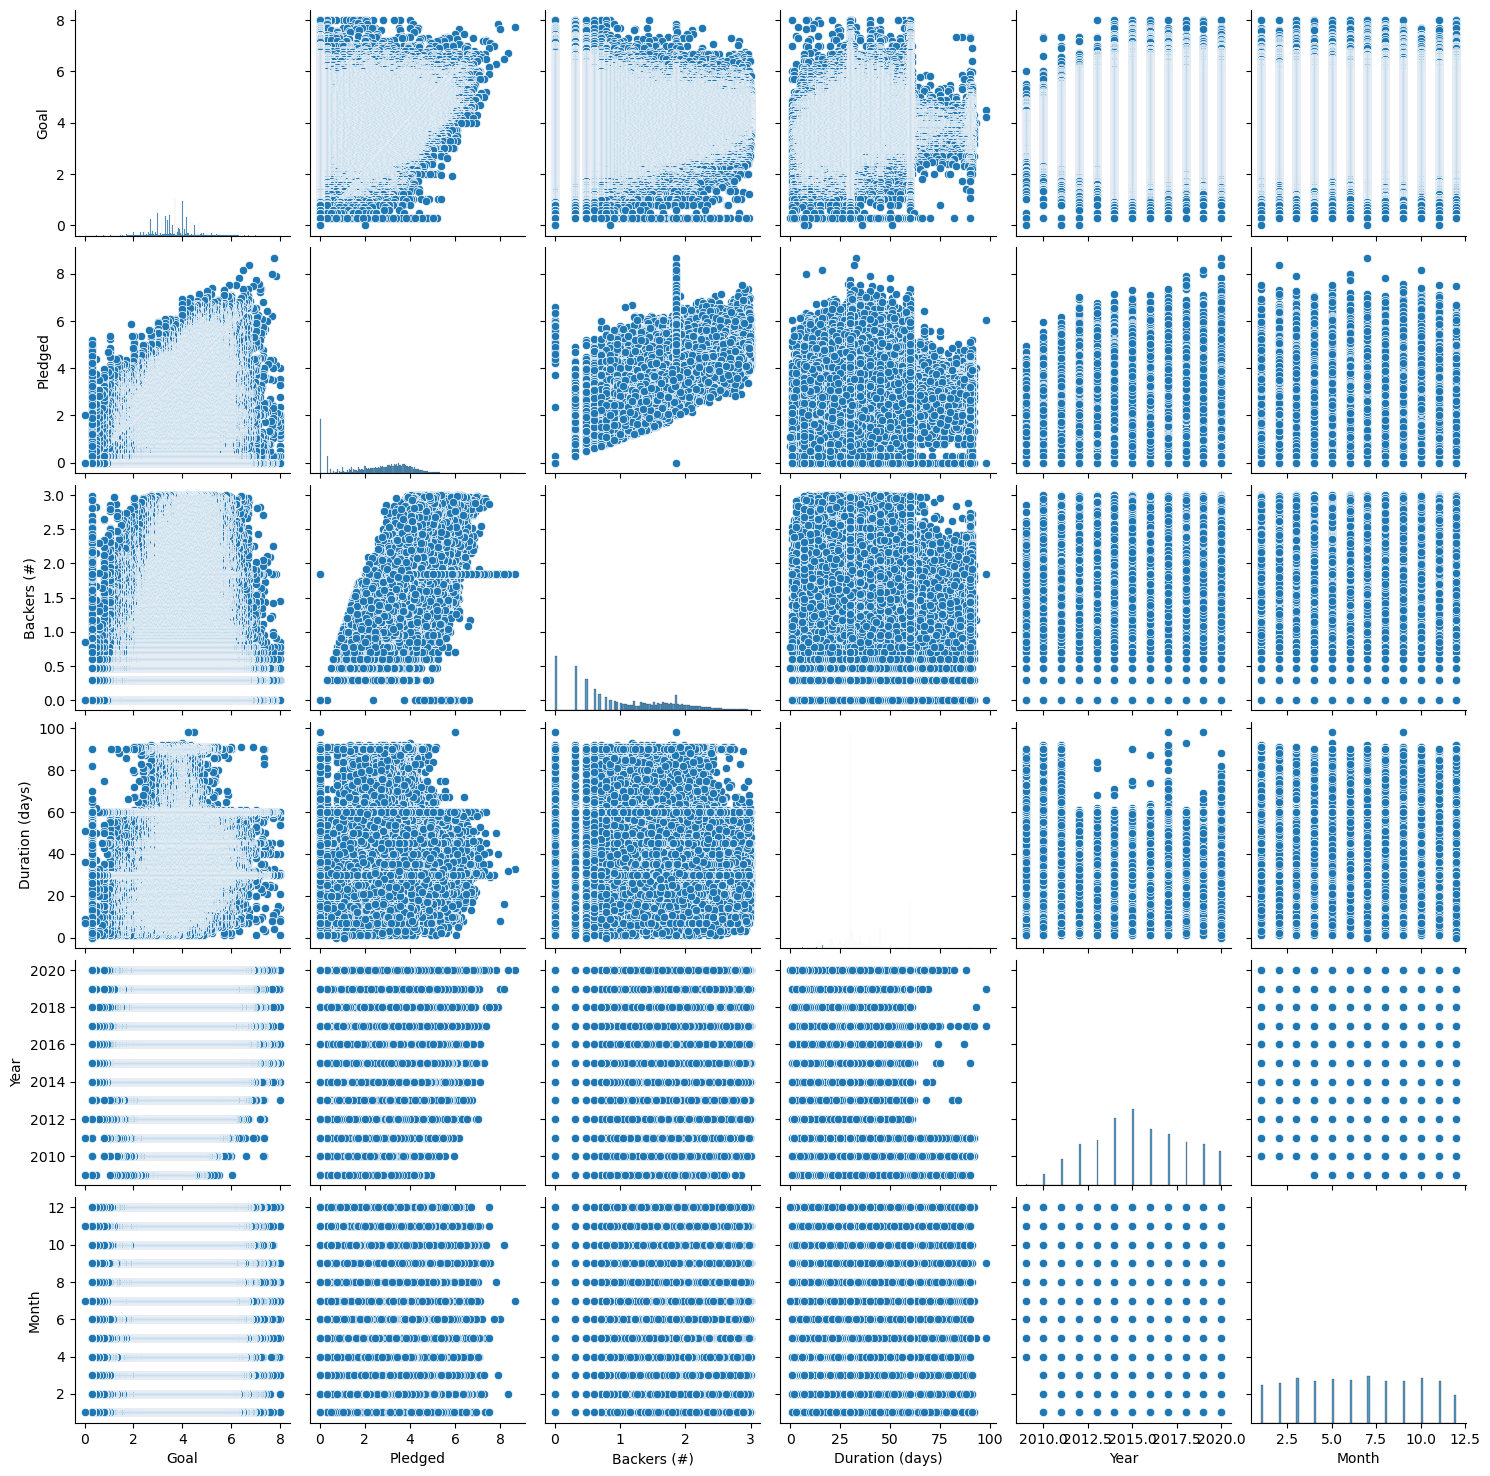

In [69]:
make_pairplot(ks_copy)

Some relationship between pledged and backers which makes sense

/tmp/ipykernel_173525/3471953491.py:110: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataframe.corr()


<Axes: >

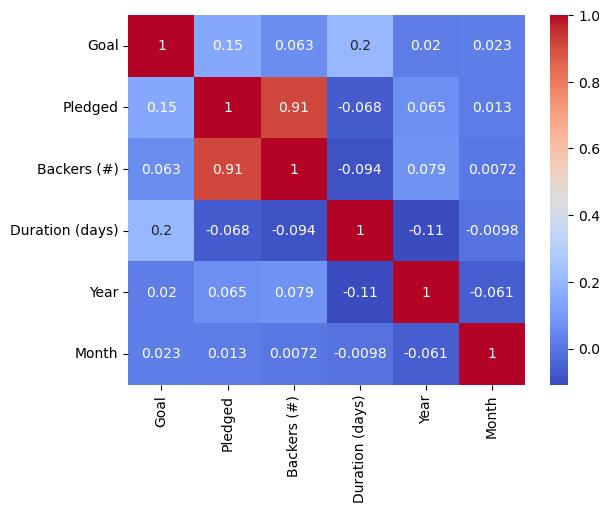

In [95]:
make_heatmap(ks_copy)

again, pledged and backers seem to be correlated

# Modelling